# Ön Bilgi
**Geliştiren :** Onur Kantar - Ömer Resul Ertan

**Veri Kümesinin İçeriği :** 3 farklı sınıfa ait toplamda 3000 tweet bulunmaktadır.

**Tweet Sınıfları :** 

-	Olumlu Tweetler
-	Olumsuz Tweetler
-	Nötr Tweetler

**Veri Kümesi Referansı :** "Eğiticili ve Geleneksel Terim Ağırlıklandırma Yöntemleriyle Duygu Analizi", Mahmut Çetin, M.Fatih Amasyalı, SIU 2013, KKTC

**Algoritma :** Decision Tree (DT)

**Ağ Mimarisi :** 


**batch_size :** 

**epochs :** 

**Doğruluk Oranı :** %100


---



In [1]:
import pandas as pd                     
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
tweets = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Sets/iphone.csv", sep=',')
tweets

,TWEET,CLASS
0,loving my new #iphone6,1
1,iphone 6 + in full effect at tag all day; ever...,1
2,#win an #iphone6 sweepstakes http://t.co/r7mya...,1
3,early morning i phone masters training!! #appl...,1
4,remote control iphone 6 http://t.co/nncexfdgf6...,-1
...,...,...
527,so i cracked my phones screen. #iphone6 #broke...,-1
528,@getrhinoshield any idea when will you ship th...,-1
529,like you got a iphone6 and a black in your mou...,1
530,i was due for an upgrade 2 months ago... why h...,-1


# Veri Kümemizi Düzenleyelim : 

---



### NULL Değerleri Silme İşlemi : 

In [3]:
tweets.isnull().sum()

TWEET    0
CLASS    0
dtype: int64

In [4]:
tweets = tweets.dropna().reset_index(drop=True)
tweets.isnull().sum()

TWEET    0
CLASS    0
dtype: int64

### Gereksiz Kelimeleri - Boşukları - İşaretleri Silme İşlemleri :  

In [5]:
nltk.download('stopwords')
stop_word_list = stopwords.words('english')
stop_word_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
def preprocess_text(sen):
    
    # Sayıları Silme İşlemi
    sentence = re.sub('[\d\s]', ' ', str(sen))

    # URL Silme işlemi
    sentence = re.sub(r"http\S+", "", str(sentence))

    # Noktalama İşaretlerini Silme İşlemi
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    
    # Tek Karakterleri Silme İşlemi
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
    
    # Birden Çok Boşluğu Silme İşlemi
    sentence = re.sub(r'\s+', ' ', sentence)
        
    # Engellenecek Kelimeleri Silme İşlemi
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)
    
    # Tüm Harfler Küçük Harfe Dönüştürülüyor
    return single_doc.lower()

In [7]:
x = tweets['TWEET']
y = tweets['CLASS']

In [8]:
x = x.apply(preprocess_text)
pd.DataFrame(data=x)

,TWEET
0,loving new iphone
1,iphone full effect tag day everyday maclife ap...
2,win iphone sweepstakes mya cexo
3,early morning phone masters training apple iphone
4,remote control iphone ios mobile apple iphone ...
...,...
527,cracked phones screen iphone brokenscreen sad ...
528,getrhinoshield idea ship order today broke iph...
529,like got iphone black mouth dont tell dont got...
530,due upgrade months ago gotten iphone


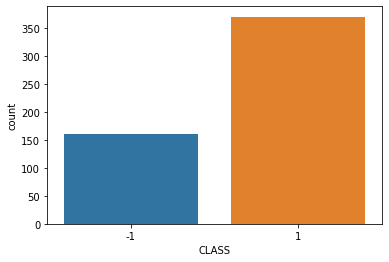

In [9]:
sns.countplot(y)

## Kelimeleri Sayılara Dönüştürelim : 

Veri setimizin işlenebilmesi için text verileri numaralara çevirmemiz gerekir.


In [10]:
token = Tokenizer()
# Her kelimenin sıklığını hesaplar
token.fit_on_texts(x)
# Tüm kelimeleri sayı dizisine dönüştürür
x = token.texts_to_sequences(x)
# Bütün metinlerimiz en uzun kelimeden oluşan metnimiz kadar sütundan oluşan (23) bir dizi ile temsil edilecek.
# 23'den kısa metinlerin boşlukları 0'lar ile doldurulacak.
x = pad_sequences(x)

In [11]:
pd.DataFrame(x).sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
94,0,0,0,0,0,0,0,0,0,0,0,0,15,6,4,3,1
205,0,0,0,0,0,0,0,0,188,129,427,7,11,1,80,103,414
436,0,0,0,0,0,0,1,507,508,1,33,509,34,144,73,157,74
125,0,0,0,0,0,0,0,0,0,212,331,862,1,51,82,863,864
117,0,0,0,0,0,0,0,0,0,0,0,0,0,152,7,847,1


## X Verilerimizi Ölçeklendirelim : 

**Verileri Ölçeklendirme Nedir?**

Ölçeklendirme dediğimiz şey veri setindeki iki farklı özelliğin (değişkenin) değerlerini en doğru şekilde analiz edebilmemize olanak sağlayan bir yöntemdir.

- Verilerinizin dağılımının ortalama değeri 0 ve standart sapma değeri 1 olacak şekilde değiştiriyoruz (Standartlaştırma).
- Tutarlılık oluşuyor. Bir veri diğer verilerden daha büyükse diğerleri üzerinde egemenlik kurabilir. Bunu istemeyiz.
- Bir öğrenme modeliyle çalışırken, özellikleri sıfır merkezli bir aralığa ölçeklemek önemlidir.
- Değerleri karşılaştırmak yerine oranları karşılaştırmış oluruz.

**Örnek :**

İki farklı insan düşünelim. Bu insanların birisinin geliri ayda 5.000 Türk Lirası iken diğerinin geliri ayda 200.000 Türk Lirası olsun. Bu insanların ikisi de her ay belirli miktarda maddi yardım için maaşlarının bir kısmını ayırıyorlar. Diyelim ki 5.000 Türk Lirası maaşı olan şahıs 1.500 Türk Lirasını yardıma ayırıyorken, 200.000 Türk Lirası alan şahıs 10.000 Türk Lirasını yardım için ayırıyor.

Normal bir gözle bakarsak 10.000 Türk Lirası yardımda bulunan kişinin daha fazla yardım yaptığını görürüz. Fakat bunu oranladığımızda 5.000 Türk Lirası alan kişinin oransal olarak kat kat fazla yardım yaptığı anlaşılacaktır. İşte özellik ölçeklendirme ile biz bu özelliklerin sayısal değerlerinin birbirine yakın olmasını sağlayıp aralarındaki değerleri karşılaştırmak yerine oranları karşılaştırırız.

In [12]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [13]:
pd.DataFrame(x).sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
404,-0.053857,-0.091054,-0.132778,-0.214741,-0.272959,-0.292325,-0.374963,3.705889,-0.448751,-0.436756,0.700802,-0.490186,2.721387,-0.479272,2.294928,0.314650,2.009198
433,-0.053857,-0.091054,-0.132778,-0.214741,-0.272959,-0.292325,-0.374963,-0.436877,-0.451810,-0.502290,-0.546203,-0.539376,-0.215758,-0.504706,-0.622792,2.389900,-0.808899
282,-0.053857,-0.091054,-0.132778,-0.181649,4.594224,-0.288270,3.346736,-0.102257,3.140035,0.319618,0.610294,-0.262359,2.182791,2.027081,1.814715,1.771604,-0.034475
4,-0.053857,-0.091054,-0.132778,-0.214741,1.998670,1.929753,-0.371791,-0.348040,0.184564,-0.496829,-0.543689,-0.039710,-0.488647,-0.206441,-0.706400,-0.729394,-0.175279
12,-0.053857,-0.091054,-0.132778,-0.214741,-0.272959,-0.292325,-0.374963,-0.436877,-0.451810,-0.502290,-0.546203,-0.580799,-0.629879,-0.691989,-0.706400,-0.053333,-0.155164


# Y Verilerimizi One Hot Encoding Uygulamamız Gerekiyor :  


---


**One Hot Encoding Nedir?**

One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem, ağın model için problemi daha kolay hale getirmesine yardımcı olabilir. 


- Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
- Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.

In [14]:
pd.DataFrame(y).sample(5)

,CLASS
61,1
90,1
137,-1
204,1
44,-1


In [15]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y).sample(5)

,0
457,1
50,1
493,1
40,1
2,1


In [16]:
y = to_categorical(y)
pd.DataFrame(y).sample(5)

,0,1
315,1.0,0.0
55,0.0,1.0
111,0.0,1.0
253,0.0,1.0
104,0.0,1.0


# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim : 

---


In [17]:
#x = np.reshape(x, (x.shape[0], x.shape[1], 1))
#y = np.reshape(y, (y.shape[0], y.shape[1], 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

x Train : (425, 17)
x Test : (107, 17)
y Train : (425, 2)
y Test : (107, 2)


In [19]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics

In [20]:
"""model = Sequential()

model.add(SimpleRNN(units = 20, activation = "relu", use_bias = True, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 20, activation = "relu", use_bias = True, return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 20, activation = "relu", use_bias = True, return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 20, activation = "relu", use_bias = True, return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 20, activation = "relu", use_bias = True))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
history = model.fit(x_train,y_train,batch_size=2,epochs=5,verbose=1,validation_data=(x_test, y_test))
"""

model = Sequential()

model.add(Embedding(1000, 20, input_length=17))
model.add(SimpleRNN(units = 20, activation = "relu", use_bias = True))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

history = model.fit(x_train,y_train,batch_size=2,epochs=10,verbose=1,validation_data=(x_test, y_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 17, 20)            20000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            3904      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 1ms/step - loss: 0.6452 - acc: 0.6882 - val_loss: 0.6032 - val_acc: 0.7290
Epoch 2/10
425/425 [==============================] - 0s 902us/step - loss: 0.6207 - acc: 0.6894 - val_loss: 0.5966 - val_acc: 0.7290
Epoch 3/10
425/425 [==============================] - 0s 880us/step - loss: 0.6039 - acc: 0.6894 - val_loss: 0.6026 - val_acc: 0.7290
Epoch 4/10
425/425 [==============================] - 0s 871us/step - loss: 0.5966 - acc: 0.6894 - val_loss: 0.6013 - val_acc: 0.7290
Epoch 5/10
425/425 [==============================] - 0s 965us/step - loss: 0.5948 - acc: 0.6894 - val_loss: 0.6024 - val_acc: 0.7290
Epoch 6/10
425/425 [==============================] - 0s 874us/step - loss: 0.5944 - acc: 0.6894 - val_loss: 0.6174 - val_acc: 0.7290
Epoch 7/10
425/425 [==============================] - 0s 885us/step - loss: 0.5958 - acc: 0.6894 - val_loss: 0.6001 - val_acc: 0.7290
Epoch 8/10
425/425